# modern NLP 의 흐름에 올라타보자

## 변화의 흐름 - Word Embedding 과 Context

우리는 NLP task 를 풀기 위하여 인간의 언어를 컴퓨터의 언어로 바꾸어 주는 작업을 반드시 거쳐야만 합니다. (임베딩)  
단어가 가지고 있는 의미를 숫자에 녹여내기 위해서 tf-idf, word2vec, fasttext 등 다양한 임베딩 방법들을 공부해 보기도 했지요.  
우리가 기존에 배웠던 임베딩 방식은 워드임베딩(Word Embedding)이라고 합니다. 즉, 단어 하나하나를 임베딩하는 방식이지요.

그런데..

생긴 것은 똑같이 생겼는데 다른 뜻을 가지고 있는 단어들(동음이의어, 다의어 등)은 어떻게 표현될지? 생각해 본 적 있나요?

예시: 차
- 시간이 늦었으니 커피 말고 차나 한 잔 마시자
- 제주도는 버스로 움직이기 힘들어. 차가 있어야 해.
- 축구공을 이쪽으로 차.

똑똑한 여러분은 '문맥을 고려하는 임베딩(Contextual Embedding)을 만들면 되지 않나?!'라고 생각하실 겁니다.

바로 앞으로 등장하는 모델들은 이러한 문맥(context) 을 잘 반영하는 모델들입니다.

## Transfer Learning과 Language Modeling

### Transfer Learning (전이 학습)

자연어에서의 전이 학습은 언제, 어디서 사용되는 것일까요?

### Language Modeling(언어 모델)

자연어 처리에서의 전이 학습은 보통 language model(언어 모델)과 관련이 깊습니다.

언어 모델은 
- 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 됩니다. 
- 즉, 언어 모델은 철수가 밥을 마셨다인지 철수가 밥을 먹었다인지를 데이터로부터 학습을 하게 됩니다. 이렇게 학습을 완료한 언 어모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 익히게 됩니다.

자연어 처리에서 바로 이 언어 모델이 pretrained model이 되는 것입니다. 
- 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이지요. 
- 이처럼 주어진 문제(다운스트림 테스크 혹은 downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부릅니다.

### Transformer

사실 최근 NLP의 가장 큰 흐름은 트랜스포머라고 해도 무방하다고 생각합니다. 

GPT, BERT 등 이후에 만들어지는 모델들은 트랜스포머가 기반이기 때문이죠.

또한, BERT를 시작으로 BERT를 개선하는 수많은 모델들이 나오기 시작했습니다. 성능 또한 향상되었구요!

따라서 modern NLP라고 하면 Transformer를 빼놓을 수 없답니다!

## ELMO(Embedding from Language Models)

ELMo는 문맥(context)을 반영한 임베딩을 pretrained model로 구현한 첫 번째 사례입니다.  
언어 모델을 이용하여 임베딩을 한 것인데요. 이름에 포함된 LM이 바로 이 언어 모델을 가리키죠.

### ELMo 의 구조

ELMo 는 세 가지 요소로 구성되어 있습니다.
- character-level CNN
- bidirectional LSTM
- ELMo 레이어

## GPT(Generative Pre-Training Transformer)

GPT는 트랜스포머의 decoder 구조만을 이용하여 만든 네트워크입니다.  
트랜스포머의 decoder를 아주 깊고 깊게 쌓아 많은 데이터를 학습 시켜 성능을 높힌 네트워크죠

### GPT 의 구조

'Decoder만을 이용했다는 게 뭐야?'🤔

Decoder는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 이루어져 있었습니다. 바로 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면?!

따란- GPT가 되는 것이죠.

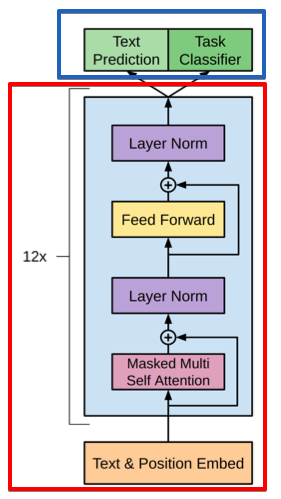

In [1]:
from IPython.display import Image
Image(filename='capture/19_gpt.png') 

### Embedding

GPT는 텍스트의 Embedding으로 BPE(Byte-pair Encoding) 를 사용하고 있어요.

BPE는 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치는 subword tokenization이었죠! 처음 보는 단어일지라도 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 해결할 수 있다는 장점이 있었습니다.

기존 트랜스포머와 마찬가지로 position encoding(포지션 인코딩)도 함께 사용한답니다.

### Masked Multi-Head Attention

Masked Multi-Head Attention은 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기회귀적(Autoregressive)인 특성을 부여하기 위해 만든 장치입니다.

여기서 자기회귀적이라 함은 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고 그다음 단어를 예측(Next Token Prediction)하게 하는 형태로 학습되는 형태라는 뜻이죠.

이는 마치 sequence-to-sequence 모델에서 디코더가 번역 문장을 생성할 때 time-step을 하나하나 거치듯이 만들어주는 것입니다.

순차처리 방식의 RNN과 달리 정답 문장의 모든 단어를 한꺼번에 입력받는 트랜스포머의 decoder는 학습할 때 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하게 됩니다.

'어!? 근데 그렇게 생겼다면 어디서 본 것 같은데?!'🤔 라고 생각하신 분 계신가요?

사실 위에서부터 언급했듯이, 이 구조는 저희가 열심히 공부했던 언어 모델과 같은 구조입니다. 

다시 한번 되짚어 보자면, 언어 모델은 비지도 학습을 통해 문장의 자연스러운 순서를 학습하게 됩니다.  
그래서 GPT는 문자 생성에 매우 특화되어 있답니다. 

pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 됩니다. 바로 파란색 박스 부분에 해당되는 부분이죠.  
여기서 우리는 기존에 봐왔던 모델들과 조금 다른 점을 발견할 수 있습니다. 바로 두 개의 Objective가 존재하는 것이죠.

말 그대로 모델이 두 가지의 문제를 동시에 푸는 겁니다.  
text prediction과 text classification이 각각 다른 모델들을 이용하여 output을 만들어내는 것이 아니라 한 모델에서 동시에 output을 내는 겁니다.

그렇다면 GPT의 모델 부분을 코드로 한 번 확인해 볼까요?.  
전체 코드를 한 번에 보면 복잡해 보일 수도 있겠지만, TFGPT2MainLayer라는 전체 모델 클래스 안에서 TFBlock 레이어 클래스를 반복해서 사용하고 있는 부분을 눈여겨 봐주세요. TFBlock 클래스 안에서 TFAttention, TFMLP 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있습니다.

모델이 한 개인데 어떻게 classification, entailment 등등 다양한 문제를 풀 수 있을까요?

바로 <b>input을 변형시켜서</b> 입니다.

예를 들어 classification task를 풀기 위해 finetuning을 하게 된다면 `<start> <input text> <extract> <class>` 이렇게 구성된 데이터셋을 학습시키면 되는 것이죠. GPT는 이 데이터셋에 맞추어서 weight들을 조정하게 될 것입니다.

#### GPT vs. GPT2

원리는 똑같아요. GPT의 모델 구조를 그대로 사용하면서 파라미터 사이즈를 10배 정도 키우고 성능을 개선시킨 모델이 바로 GPT2입니다.

#### GPT3

2020년 6월 GPT3가 공개되었습니다. GPT1의 1000배, GPT2의 100 배 이상의 파라미터를 갖췄고, 성능도 크게 향상되었습니다. 

GPT3가 할 수 있는 작업에는 언어 관련 문제 풀이, 랜덤 글짓기, 간단한 사칙 연산, 번역, 간단한 웹 코딩, 문장 교정 등이 있었습니다.

#### GPT Neo

GPT3를 복제한 GPT-Neo라는 모델이 EleutherAI라는 비영리 오픈 소스 연구 단체에서 오픈 소스로 공개되었습니다.  
모델 뿐 아니라 대규모 데이터과 사전학습된 모델도 공개되었죠. 

최근에는 60억 개의 파라미터를 가진 GPT-J-6B를 공개하기도 하였습니다.  
GPT3보다 작은 파라미터를 가지고 있지만 GPT3와 유사한 수준의 파라미터 수를 갖는 모델인 GPT-NeoX을 만들고 있다고 하니 기대해 보아도 좋을 것 같습니다.

https://github.com/EleutherAI/gpt-neo 참고

## BERT(Bidirectional Encoder Representations from Transformers)

대망의 BERT 입니다.

2018년 돌연 혜성처럼 나타나 NLP계를 점령했던 BERT, 성능도 성능이지만 이후로도 많은 연구들에 영감을 주었던 모델입니다.

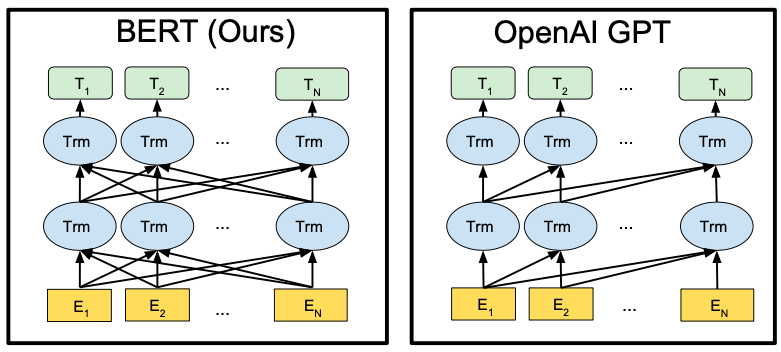

In [1]:
from IPython.display import Image
Image(filename='capture/19_bert_vs_gpt.png') 

먼저 GPT와 비교해 보겠습니다.

트랜스포머의 decoder를 이용하여 만든 모델인 만큼 GPT는 input을 한 방향으로만(uni-direction) 보게 됩니다.  
다음 단어를 예측해야만 하는 LM의 특징이었죠.

이와는 다르게 BERT는 양방향(bi-direction)으로 input을 보고 있는 것을 확인할 수 있습니다. (사실 BERT의 B는 Bi-direction을 의미하고 있습니다.)

그림에서는 보이지 않지만 또 다른 큰 차이점이 존재합니다.  
BERT는 트랜스포머의 encoder만을 사용한 모델입니다.

### BERT 의 구조

BERT는 트랜스포머의 encoder 구조를 이용한 모델입니다.

### 1. Transformer Encoder Block

#### 1) Embedding(임베딩)

BERT는 기존의 트랜스포머와는 유사하지만 다른 임베딩 체계를 가지고 있습니다. 세 가지 임베딩을 가지고 있다.

- Token Embedding
  - 우선 Wordpiece을 이용하여 3만 개의 vocabulary를 학습합니다. 학습한 Wordpiece model을 이용하여 token들을 임베딩해줍니다.
- Segment Embedding
  - BERT는 두 가지 sentence(BERT의 논문에서 나오는 sentence는 문장의 의미보다는 텍스트 덩어리의 의미입니다.)를 입력으로 받기 때문에 이 두 가지 sentence를 구분해야 할 필요가 있습니다. 
  - segment embedding은 바로 이를 위해서 존재하는데요. 모델 입장에서 주르륵 이어진 텍스트들의 덩어리를 나누어주는 역할을 합니다. 
  - 그림에서도 [SEP]토큰으로 구분된 두 sentence에서 앞부분은 A, 뒷부분은 B로 나누어 임베딩하는 것을 확인하실 수 있습니다.
- Position Embedding
  - 마지막으로 position embedding입니다. 
  - 두 sentence를 나누는 것은 segment embedding에서 해주지만, sentence 안에서의 순서는 아직 모르는 상태입니다. 
  - 따라서 문장 내에 절대적인 위치(순서)를 알려주기 위해 필요한 것이 position embedding입니다.

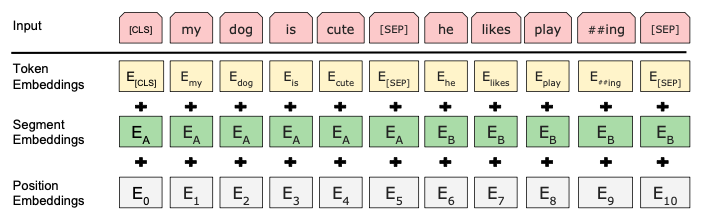

In [2]:
from IPython.display import Image
Image(filename='capture/19_BERT_embedding.png') 

이렇게 얻은 세 가지 임베딩을 모두 합산해 주면 BERT의 임베딩이 완성됩니다. 

이후 layer normalization과 dropout까지 해주면 트랜스포머 첫 블록의 입력이 완성됩니다.

그럼 BERT에는 어떤 토큰들이 어떻게 쓰였나 알아보고 가실까요?

- [CLS] : sentence의 시작을 알리는 토큰
- [SEP] : sentence의 종결을 알리는 토큰, sentence를 구분하는 데에 사용하기도 함
- [MASK]: 마스크 토큰
- [PAD] : 배치 데이터의 길이를 맞춰주기 위한 토큰

#### 2. Activation Function : GELU

Feedforward Networks에서 BERT는 ReLU대신 GELU를 사용합니다.  
음수 값은 0이 되어버리는 ReLU와는 달리 GELU는 음수에서도 완만한 곡선을 그리며 미분을 가능하게 합니다. 

GELU를 사용하면 성능이 더욱 좋아지기 때문에 BERT의 저자들은 GELU를 사용했다고 합니다.

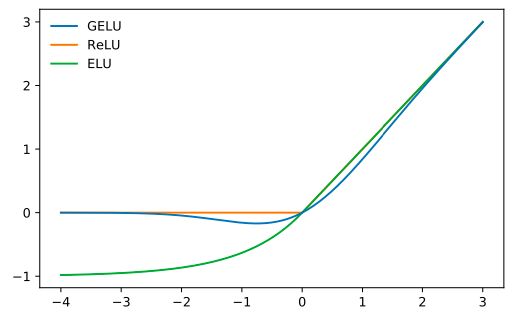

In [3]:
from IPython.display import Image
Image(filename='capture/19_GELU.png') 

### BERT 의 학습

BERT는 양방향(Bi-direction)을 강조한 모델입니다. BERT는 그럼 어떻게 학습을 하는 것일까요? 두 가지 핵심 아이디어를 들여다보죠.

### 1) Masked LM (MLM)

BERT는 마스크 된 토큰([MASK])만 맞추면 되는 masked LM(MLM)을 제안했습니다.  
즉, input sequence의 순서에 상관없이 전체 문장을 모두 볼 수 있게 되는 거죠.

MLM을 위해서 BERT는 학습 데이터의 전체에서 15% 를 [MASK] 토큰으로 랜덤하게 바꿉니다. 여기서 재미있게도 15%에 해당하는 모든 토큰들을 마스크하는 것이 아니라 
- 80%는 [MASK]토큰, 
- 10%는 무작위로 랜덤한 토큰으로 바꿔줍니다. 
- 나머지 10%는 원래의 토큰을 그대로 사용하구요.

그 이유는 바로 finetuning에 있는데요.

pretrain을 끝낸 모델을 finetuning할 때에는 input에 [MASK]토큰이 등장하지 않기 때문입니다. 

아무래도 finetuning시에 [MASK]토큰이 보이지 않는다면, 당연히 성능에 영향을 미치게 될 것이라고 생각한 거죠.  
따라서, [MASK]토큰이 아닌 것들도 예측을 하도록 학습하여 문장 자체에 대한 전반적인 이해(문맥에 대한 이해)를 할 수 있도록 해주는 겁니다.

다시 정리하자면, 전체 학습 데이터의 토큰들 중 12%(15% 중에서 80%)는 [MASK]토큰으로, 1.5%(15% 중에서 10%)는 무작위로 랜덤한 토큰으로 대체하고, 1.5%((15% 중에서 10%)는 변경하지 않고 원래의 토큰을 사용하는 겁니다.

### 2) Next Sentence Prediction (NSP)

BERT는 마스크 된 토큰을 맞추는 것과 동시에 또 다른 task를 함께 학습합니다.  
바로 Next Sentence Prediction (NSP), 다음 문장인지 확인하기 입니다.

예시를 한 번 들어볼까요?

예시  
- 여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나
- 그 사람이 바다의 뚜껑 닫지 않고 돌아가
- 그때부터 바다의 뚜껑 열린 채 그대로 있네
- 하라 마스미 「바다의 뚜껑」 중

두 sentence 가 연속해서 오는 지 여부를 학습
- [CLS]여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 [SEP] 그 사람이 바다의 뚜껑 닫지 않고 돌아가[SEP] → TRUE(IsNext)
- [CLS]여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 [SEP] 한강에서 자전거 타며 아이스 아메리카노를 마시고 싶다[SEP] → FALSE(NotNext)

NSP를 위해서 BERT의 학습 데이터는 1건당 두 개의 문장으로 구성합니다. 50%의 확률로 TRUE와 FALSE를 부여하도록 만들죠.

### 3. Fine-tuning Task

BERT의 finetuning은 그럼 어떻게 진행할까요?

BERT 또한 한 모델이 다양한 task들을 수행하기 때문에 input transformation을 이용합니다.

classification 같은 경우는 [CLS]토큰을, QA와 같이 문장이나 단어들이 나와야 하는 경우에는 토큰들의 벡터를 output layer에 넣어 output을 산출해냅니다.

### 4. BERT 의 모델 코드

Transformer, GPT와 다른 부분을 유심히 보면서 모델을 훑어본다면 더욱 도움이 될 거예요!.   
메인 모델 구조인 TFBertEncoder 안에 반복적으로 사용되고 있는 TFBertLayer 레이어 구성을 자세히 살펴주세요. 

전체 구조를 한눈에 보기에는 복잡하게 느껴지시더라도, 다음 노드에서 단계별로 차례차례 구현해 보면서 좀 더 명확하게 이해하실 수 있으실 겁니다.  
https://arxiv.org/abs/1810.04805

이후의 볼 모델들은 트랜스포머가 베이스인 모델의 한계점을 어떻게 극복해나가는가에 초점이 있습니다.   
성능이 잘 나오긴 하지만 사실 GPT, BERT와 같은 모델들은 어마어마한 학습 시간과 컴퓨팅 파워가 있어야 가능한 모델들이랍니다.

## Transformer-XL (Transformer Extra Long)

transformer-XL은 기존의 언어 모델과 트랜스포머가 가지고 있던 한계점을 개선한 모델입니다. 

트랜스포머 이전의 LM에서도 늘 한계점으로 꼽히던 context를 반영하기가 트랜스포머에서도 문제로 떠오릅니다.
- 비교적 짧은 문장에서의 context는 잘 학습했는데, sequence가 길어질수록 그 상관관계(long-term dependency)가 점점 떨어진다는 것이 문제였죠.
- 주제에 대해서 잘 말하다가 갑자기 다른 이야기를 한다던가 하는 문제 말이에요.

transformer-XL은 직관적인 그 이름에서도 드러나듯이 좀 더 긴 context를 어떻게 담을 것인가에 대해 고민한 모델입니다.

어떻게 해서 transformer-XL은 context를 이어나갈까요?

### transformer-XL의 구조

transformer-XL을 알아보기에 앞서 트랜스포머를 좀 더 자세히 보죠.

#### 1. Vanilla Transformer LMs

트랜스포머는 max_seq_length가 정해져 있습니다. 
- 즉, 모델이 감당할 수 있을 만큼 텍스트를 잘라서 학습하고, 학습한 이후부터 다시 일정 길이만큼 잘라서 학습을 하게 되죠. 

이때, 이전 segment에서 학습했던 context는 무시되고, 지금 학습을 하고 있는 segment 안에서만 context를 고려하게 됩니다. 
- 다시 말해서 segment1과 segment2는 전혀 공유하는 context가 없이 단절되었다(context fragmentation)는 말입니다. 

분명 사람이 볼 때는 이어지는 흐름인데 말이죠.

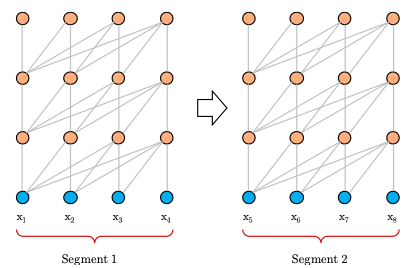

In [1]:
from IPython.display import Image
Image(filename='capture/19_vanilla_transformer.png') 

테스트 시 또 다른 문제가 등장하게 되죠. 

바로 슬라이딩을 하면서 생기는 문제입니다. 
- 모델은 일정 길이의 context를 보고 한 단어를 예측합니다. 
- 그다음에 딱 한 개만큼만 슬라이딩하여 새로운 context를 만들고 다시 연산하여 하나의 단어를 예측합니다.

이렇게 하면 이전 context를 조금씩이나마 유지할 수 있을지 모르지만 연산에 드는 비용이 엄청나겠죠?

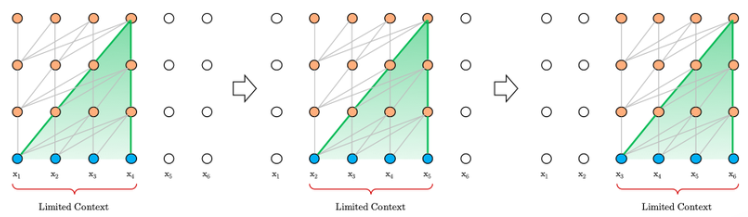

In [2]:
from IPython.display import Image
Image(filename='capture/19_vanilla_transformer_test_process.png') 

#### 2. Segment-level recurrence with state reuse

이러한 문제들을 해결하기 위해 저자들은 recurrence 메커니즘을 도입합니다.  
- 학습 시에 이전 segment에서 계산했었던 hidden state를 사용하는 것이죠. 
- 이를 통해 context fragmentation을 해결하고 long-term dependency를 유지할 수 있게 됩니다.

RNN의 원리를 떠올리면 쉽게 와닿으실 겁니다.  
그러나 RNN과는 달리, transformer-XL은 다음 layer에서 이전 layer의 hidden state를 재사용하게 됩니다.

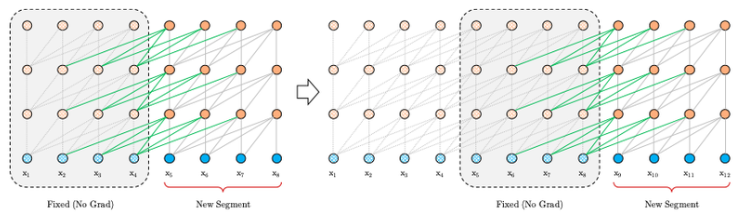

In [3]:
from IPython.display import Image
Image(filename='capture/19_recurrence_in_vanilla_transformer.png') 

단, 이때 이전 segment들의 정보를 가진 hidden state들의 gradient는 더 이상 변하지 않도록 고정을 시킵니다.  
(메모리에 있던 값을 불러온다고 하여 cache라고 부르기도 합니다)

트랜스포머 구조의 LM이 테스트 시 가지고 있던 문제도 recurrence 메커니즘을 이용하면 쉽게 해결할 수 있습니다.  
이미 계산한 hidden state의 정보를 메모리에 가지고 있다가 cache를 하기 때문에 계속해서 반복하여 똑같은 연산을 할 필요가 없어집니다.  
이 덕분에 속도도 더욱 빨라질 수 있습니다.

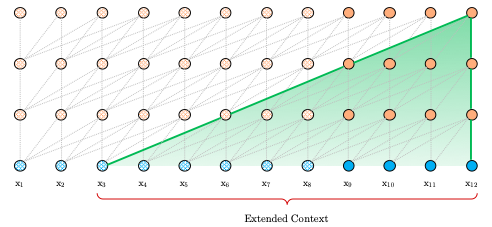

In [4]:
from IPython.display import Image
Image(filename='capture/19_recurrence_in_vanilla_transformer_test_process.png') 

#### 3. Relative Positional Encodings

트랜스포머에 segment-level의 recurrence 메커니즘을 적용하면 한 가지 문제가 발생합니다.  
바로 포지션 정보를 어떻게 추가할 것인가에 대한 문제이죠.

기존 트랜스포머의 포지션 인코딩은 각 segment 내에서의 절대적인 위치 정보를 인코딩하게 됩니다.

그러나 recurrence 메커니즘을 사용하게 되면 segment들 사이에서의 상대적인 위치 정보가 필요합니다.

이를 위해 저자들은 상대적인 포지션 인코딩(Relative Positional Encodings) 방법을 제안합니다.

수식 때문에 조금 복잡해 보일 수도 있지만, 기억하실 것은 상대적인 정보를 임베딩 레이어가 아닌 attention 연산 시에 주입한다는 것입니다.

## XLNet, BART

### XLNet

XLNET은 구글 연구팀에서 발표한 논문으로 이전 스텝에 다루었던 transformer-XL을 이용한 아키텍처입니다.  
참고로 XLNet에서 XL이란 'eXtra-Long'에서 나왔으며, 트랜스포머보다 더 넓은 범위의 문맥을 볼 수 있다는 것을 강조하게 위해서 XLNet이라는 이름이 붙었다고 합니다.

https://arxiv.org/abs/1906.08237 논문에서는  
GPT 의 AR(AutoRegressive) 언어 모델과 BERT의 AE(AutoEncoding) 언어 모델과는 다른 퍼뮤테이션(Permutationi) 언어 모델을 통해 더욱 정교한 언어 모델 성능을 선보이고 있습니다.

#### 퍼뮤테이션(Permutation) 언어 모델

임베딩 모델의 최근 흐름은 AR 모델과 AE 모델로 나눠집니다.
- AR(AutoRegressive) 모델: 이전 문맥을 바탕으로 다음 단어를 예측한다.
- AE(AutoEncoding) 모델: 앞뒤 문맥을 모두 살펴 [MASK] 단어를 예측한다.

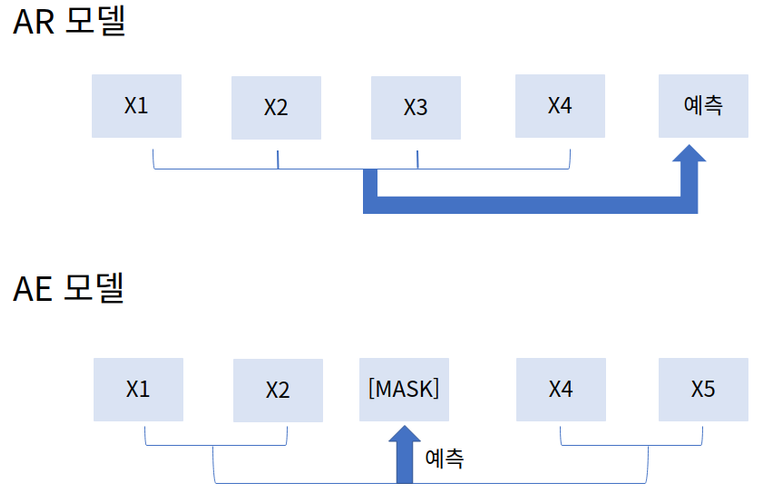

In [5]:
from IPython.display import Image
Image(filename='capture/19_ar_ae.png') 

하지만 AR 모델과 AE 모델에는 각각 치명적인 단점이 있었습니다.  
- AR 모델은 문맥을 양방향으로 볼 수 없었고, 
- AE 모델은 마스킹 처리한 토큰이 독립적으로 예측되므로 토큰 사이의 의존 관계를 학습할 수 없는데다가 fine-tuning과 evaluation 시 [MASK] 토큰이 보이지 않아 불일치가 발생했습니다.

이런 단점을 해결하기 위해 XLNet은 permutation LM을 사용하였죠.  
XLNet은 AR과 AE의 장점만을 취하여 AE처럼 양방향 context를 모두 볼 수 있는 동시에, AR처럼 예측해야 할 토큰들 간의 dependency를 놓치지 않고 학습할 수 있었습니다.

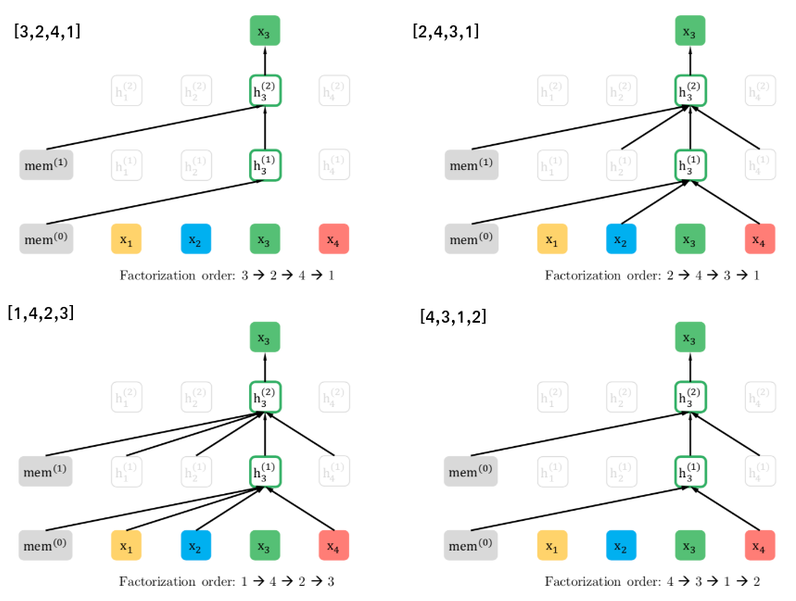

In [6]:
from IPython.display import Image
Image(filename='capture/19_permutation_lm.png') 

위 그림에서와 같이 토큰 4개의 문장을 랜덤을 뒤섞은 결과가 [3, 2, 4, 1]일 경우 X3 을 예측하려고 합니다. 

이 경우에는 3번 토큰 정보를 넣으면 문제가 너무 쉬우므로 3번 토큰 정보를 주어서는 안 되고, 2, 4, 1번 토큰 역시 3번 토큰 이후에 등장하므로 입력에서 제외해야 합니다. 따라서 입력값은 세그먼트의 메모리 정보입니다.

또다시 토큰을 랜덤으로 섞은 결과가 [2, 4, 3, 1]이고 3번 토큰을 예측해야 한다면 3번 토큰의 이전 문맥인 2번, 4번 토큰과 메모리가 입력됩니다.

토큰을 다시 섞은 후의 시퀀스가 [1, 4, 2, 3]이고 3번 토큰을 예측할 경우의 입력 벡터는 1번, 4번, 2번 토큰과 메모리입니다. 문장 시퀀스가 [4, 3, 1, 2]이고 3번 토큰을 예측할 경우는 4번 토큰과 메모리를 입력으로 넣어 줍니다. 

이를 표현한 그림입니다.

설명은 토큰을 섞는다고 하였지만 실제 구현은 어텐션 마스크로 구현되었습니다.  
그 이유는 XLNet의 기반이 트랜스포머 네트워크이고, 핵심이 쿼리(query)와 키(key) 벡터간 셀프 어텐션 기법이기 때문입니다.

permutation 언어 모델에도 단점이 있었습니다. 
- 만약 셔플된 토큰 시퀀스가 [3, 2, 4, 1]과 [3, 2, 1, 4]일 경우 모델은 동일한 입력을 받아 다른 단어를 예측해야 하죠. 

이런 경우는 어떻게 해결해야 할까요?

#### Two-Stream Self-Attention

위와 같은 문제를 해결하기 위해 XLNet은 Target-Aware Representation for Transformer라는 것을 제안했습니다. 

### BART

BART는 특정 task가 아닌 다양한 task에 적용할 수 있도록 seq2seq 구조로 만들어진 denoising auto-encoder입니다. 

BART의 경우도 XLNet과 같이 AR 모델과 AE 모델의 장점을 사용한 모델이라고 보시면 됩니다. 

아래의 그림과 같이 Encoder에서는 BERT와 같은 구조를, Decoder에서는 GPT와 같은 구조를 가지고 있죠.  
https://arxiv.org/abs/1910.13461 참고

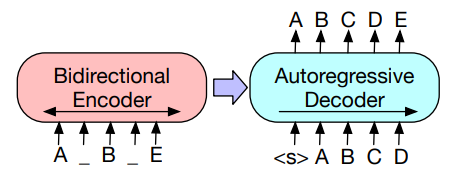

In [7]:
from IPython.display import Image
Image(filename='capture/19_BART_architecture.png') 

## ALBERT(A Lite BERT for Self-supervised Learning of Language Representations)

BERT와 같은 pretrain 모델들이 이제 NLP의 대세라는 것은 잘 알았습니다.  
그러나 이런 모델들은 개인의 장비에서 학습을 시키는 데에 조금 무리가 있습니다. TPU가 있다면 모를까요.

ALBERT는 '성능은 유지하면서 메모리는 적게 쓰는 좀 더 가벼운 BERT를 만들 수 없을까?'라는 질문에서부터 출발합니다.

### ALBERT 의 구조

ALBERT의 기본 구조는 BERT를 따릅니다.  
트랜스포머의 encoder를 기반으로 하며, activation function(활성화 함수)으로는 GELU를 사용하고 있죠.

더 가벼운 BERT를 만들기 위해 ALBERT는 아래의 세 가지 아이디어를 적용합니다.

#### 1. Factorized embedding parameterization
- BERT는 input의 token embedding(E)과 hidden layer(H)의 size가 같습니다.(E≡H) 
- ALBERT는 E를 H보다 작게 만들어서 parameter의 수를 줄입니다.

어떻게 효과적으로 적당한 V를 유지하면서, H는 키우고 E는 줄일 수 있을까요?

정답은 matrix factorization(행렬 분해) 에 있습니다.

V * H의 매트릭스를 V * E와 E * H의 매트릭스로 나누는 것입니다. 이런 기법은 추천 시스템 등 다양한 분야에서 널리 쓰이고 있는 기법이기도 합니다.

이렇게 행렬 분해를 통해 H의 사이즈는 유지한 채 E의 사이즈를 줄일 수 있습니다. 또한, parameter의 수도 줄일 수 있지요.

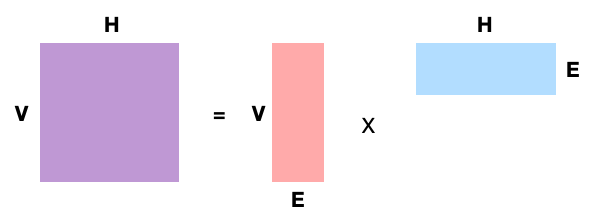

In [8]:
from IPython.display import Image
Image(filename='capture/19_matrix_factorization.png') 

#### 2. Cross-layer parameter sharing

parameter를 공유하는 방법은 parameter의 수를 줄이는 방법 중 하나입니다.  
ALBERT에서도 이 방식을 사용합니다. layer간의 모든 parameter들을 공유하는 것이죠.

사실 모델이 parameter를 공유한다는 것은 일장일단(trade-off)이 있습니다.  
더 많은 부분을 공유할수록 모델의 parameter의 수는 줄어들지만(경량화) 성능이 떨어질 우려가 있죠.  
그럼에도 불구하고 ALBERT는 기본적으로 모든 parameter들을 공유하고 있습니다.  
마치 RNN이 한 개의 hidden state를 계속 사용하는 것처럼 ALBERT는 transformer block 1개를 이용하여 재사용합니다.

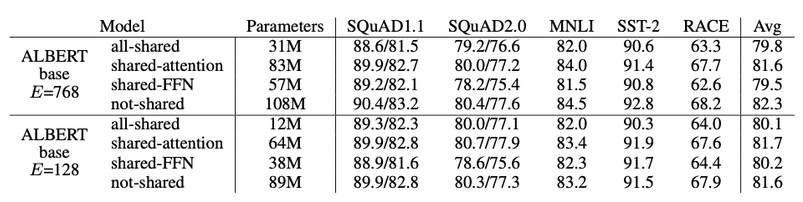

In [9]:
from IPython.display import Image
Image(filename='capture/19_albert_performance_about_parameter_sharing.png') 

#### 3. Inter-sentence coherence loss

BERT는 Masked-LM(MLM) Next Sentence Prediction(NSP)을 이용하여 model을 pre-train시켰습니다.

NSP의 경우 실제 이어지는 두 문장(positive)과, 임의로 뽑은 두 문장(negative)을 구분하는 것을 학습하게 됩니다.  
그러나 이렇게 임의로 뽑은 문장은 첫 번째 문장과 두 번째 문장의 topic이 매우 다를 가능성이 있습니다.  
다시 말하면, NSP는 두 문장의 연관 관계 보다 두 문장의 topic 차이를 구별하는 것에 가까울 수 있다는 것입니다.

ALBERT는 이런 NSP를 과감하게 삭제하고 이를 Sentence Order Prediction(SOP)로 대체합니다. 

SOP는 임의로 문장을 샘플링하는 것이 아니라, 실제 두 문장의 순서를 바꾸어 학습 데이터를 만듭니다.  
두 문장의 순서가 원래의 데이터의 순서와 일치한다면 positive, 순서가 원래 데이터와 반대로 되어있다면 negative이 되는 것이죠. 

이러한 학습을 통해 모델은 기존의 NSP보다 훨씬 더 복잡한 언어적 사이의 연관성(논문에서는 discourse-level coherence properties라는 표현을 사용합니다)을 이해할 수 있게 되는 것입니다.

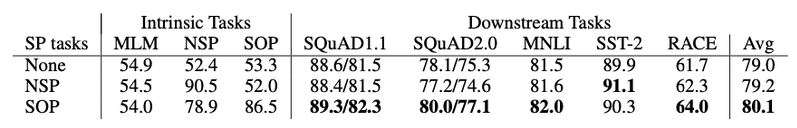

In [10]:
from IPython.display import Image
Image(filename='capture/19_nsp_vs_sop.png') 

이러한 구조들을 이용하여 ALBERT-xxlarge는 BERT-large의 약 70%의 parameter들을 가지고도 오히려 성능을 개선할 수 있게 해줍니다.